### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6


#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Гебриал Ибрам Есам Зекри
##### Группа:   НПИбд-01-18

## Москва 2021
***

### вариант 24

MAGIC Gamma Telescope Data Set 

Название файла: magic04.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope 

Класс: class (столбец No 11) 

1.         Считайте заданный набор данных из репозитария UCI.

 

2.         Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения признака. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Оставьте в наборе данных только числовые признаки.

 

3.         Вычислите и визуализируйте матрицу корреляций признаков. Удалите из набора признаки, имеющие высокую корреляцию (близкую к +1 или -1) с другими признаками.

 

4.         Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.

 

5.         Используя метод рекурсивного исключения признаков (RFE) и логистическую регрессию, определите и оставьте в наборе наиболее значимые признаки (не менее двух). Если в наборе данных осталось более двух признаков, то определите два признака с наибольшей дисперсией для визуализации.

 

6.         Масштабируйте признаки набора данных на интервал от 0 до 1.

 

7.         Используя разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%, создайте и обучите классификаторы на основе:

- наивного байесовского классификатора
- логистической регрессии
- логистической регрессии с полиномиальными зависимостями (degree равно 2 и 3)
- линейного дискриминантного анализа
- метода опорных векторов
- метода опорных векторов с полиномиальными зависимостями (degree равно 2 и 3).
 

8.         Визуализируйте для каждого из классификаторов границу решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных.

 

9.         Визуализируйте на одном рисунке ROC кривые для каждого из классификаторов, подписывая оси и рисунок и создавая легенду для методов бинарной классификации.

 

10.       Определите лучший метод бинарной классификации набора данных по показателю ROC_AUC (площади под ROC кривой).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### 1. Считайте заданный набор данных из репозитария UCI.

In [2]:
url = \
"http://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
# считываем данные в объект DataFrame
my_data = pd.read_csv( url,sep="," ,header=None )
my_data.columns = ['fLength', 'fWidth', 'fSize', 'fConc','fConc1', 'fAsym', 'fM3Long', 'fM3Trans','fAlpha', 'fDist','class']
print("\n*** Начало данных:\n", my_data.head()) #начальные данные
print("\n*** Конец данных:\n",  my_data.tail()) #конечные данные

summary = my_data.describe()                    #сводка данных 
print("\n*** Сводка данных:\n", summary)


*** Начало данных:
     fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  

*** Конец данных:
         fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135  76.9018  3.

#### 2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения признака. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Оставьте в наборе данных только числовые признаки.

In [4]:
print('Типы признаков:')
for col in my_data.columns:
    print('\t%s: %s' % (col, my_data[col].dtypes))

Типы признаков:
	fLength: float64
	fWidth: float64
	fSize: float64
	fConc: float64
	fConc1: float64
	fAsym: float64
	fM3Long: float64
	fM3Trans: float64
	fAlpha: float64
	fDist: float64
	class: object


In [5]:
mydata = my_data.select_dtypes(include=['object']).copy()
mydata.head()

,class
0,g
1,g
2,g
3,g
4,g


In [6]:
np.unique(my_data["class"])

array(['g', 'h'], dtype=object)

In [7]:
new = {"class": {'g': 0, "h": 1}}
my_data.replace(new, inplace=True)
my_data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [8]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


In [9]:
my_data = my_data.replace('?',np.NaN) # заменить '?' на np.NaN
print('Число отсутствующих значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col,my_data[col].isna().sum()))

Число отсутствующих значений:
	fLength: 0
	fWidth: 0
	fSize: 0
	fConc: 0
	fConc1: 0
	fAsym: 0
	fM3Long: 0
	fM3Trans: 0
	fAlpha: 0
	fDist: 0
	class: 0


In [11]:
mydata=my_data.drop("class",axis=1)
mydata.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


У меня нет пропущенных значений

#### 3. Вычислите и визуализируйте матрицу корреляций признаков. Удалите из набора признаки, имеющие высокую корреляцию (близкую к +1 или -1) с другими признаками.

In [12]:
mydata.corr()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332
fConc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625
fAsym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730
fM3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025
fM3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427
fAlpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556
fDist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000


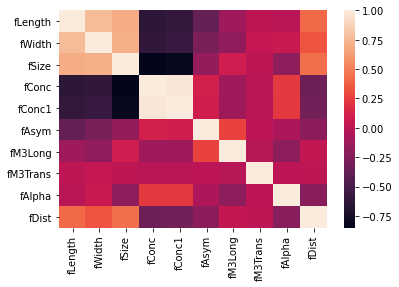

In [13]:
import seaborn 
seaborn.heatmap(mydata.corr());

In [14]:
mydata


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [15]:
mydata=mydata.drop(["fConc1"],axis=1)
mydata.head()

,fLength,fWidth,fSize,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,-5.5277,28.5525,21.8393,4.6480,356.4620


#### 4. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек

Столбец с метками классов содержит два класса: g и h

#### 5. Используя метод рекурсивного исключения признаков (RFE) и логистическую регрессию, определите и оставьте в наборе наиболее значимые признаки (не менее двух). Если в наборе данных осталось более двух признаков, то определите два признака с наибольшей дисперсией для визуализации.

In [16]:

target=my_data["class"]
target


0        0
1        0
2        0
3        0
4        0
        ..
19015    1
19016    1
19017    1
19018    1
19019    1
Name: class, Length: 19020, dtype: int64

In [17]:
mydata

,fLength,fWidth,fSize,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = mydata.values
y = target.values

# feature extraction
model = LogisticRegression(max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(X, y);
print("Число признаков: %d" % fit.n_features_)
print("Выбранные признаки: %s" % fit.support_)
print("Ранг признаков: %s" % fit.ranking_)

Число признаков: 4
Выбранные признаки: [ True False  True  True False False False  True False]
Ранг признаков: [1 3 1 1 6 2 4 1 5]


In [19]:
mydata

,fLength,fWidth,fSize,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [20]:
mydata2=mydata.drop(["fWidth","fAsym","fM3Long","fM3Trans","fDist"],axis=1)
mydata2.head()

,fLength,fSize,fConc,fAlpha
0,28.7967,2.6449,0.3918,40.0920
1,31.6036,2.5185,0.5303,6.3609
2,162.0520,4.0612,0.0374,76.9600
3,23.8172,2.3385,0.6147,10.4490
4,75.1362,3.1611,0.3168,4.6480


In [21]:
mydata2.var()

fLength    1794.780934
fSize         0.223349
fConc         0.033421
fAlpha      681.399004
dtype: float64

два признака с наибольшей дисперсией для визуализации: fLength и fAlpha

#### 6. Масштабируйте признаки набора данных на интервал от 0 до 1.

In [22]:
from sklearn.preprocessing import MinMaxScaler
np.set_printoptions(precision=3)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(mydata2[["fLength","fAlpha"]])
print(rescaledX[:5,:])

[[0.074 0.445]
 [0.083 0.071]
 [0.478 0.855]
 [0.059 0.116]
 [0.215 0.052]]


#### 7. Используя разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%, создайте и обучите классификаторы на основе:
- наивного байесовского классификатора
- логистической регрессии
- логистической регрессии с полиномиальными зависимостями (degree равно 2 и 3)
- линейного дискриминантного анализа
- метода опорных векторов
- метода опорных векторов с полиномиальными зависимостями (degree равно 2 и 3).-

In [23]:
from sklearn.model_selection import train_test_split
test_size=0.3
X = rescaledX
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13314, 2), (5706, 2), (13314,), (5706,))

наивного байесовского классификатора

In [24]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train)
nbc.score(X_test, y_test)

0.7732211706975114

логистической регрессии

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.7946021731510691

логистической регрессии с полиномиальными зависимостями (degree равно 2 и 3)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])



In [27]:
poly_log_reg2 = PolynomialLogisticRegression(degree=2)
poly_log_reg2.fit(X, y);

In [28]:
poly_log_reg2.score(X, y)

0.8124079915878023

In [29]:
poly_log_reg3 = PolynomialLogisticRegression(degree=3)
poly_log_reg3.fit(X, y);

In [30]:
poly_log_reg3.score(X, y)

0.8138801261829653

линейного дискриминантного анализа

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train);
lda.score(X_test, y_test)

0.7867157378198387

метода опорных векторов

In [32]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=10.)
svc.fit(X_train, y_train);
svc.score(X_test, y_test)

0.7937259025587101

метода опорных векторов с полиномиальными зависимостями (degree равно 2 и 3).

In [33]:
def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

In [34]:
poly_svc2 = PolynomialSVC(degree=2)
poly_svc2.fit(X_train, y_train)
poly_svc2.score(X_test, y_test)

C:\Users\iegebrial\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8158079214861549

In [35]:
poly_svc3 = PolynomialSVC(degree=3)
poly_svc3.fit(X_train, y_train)
poly_svc3.score(X_test, y_test)

C:\Users\iegebrial\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8193130038555906

 #### 8. Визуализируйте для каждого из классификаторов границу решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных.

In [36]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

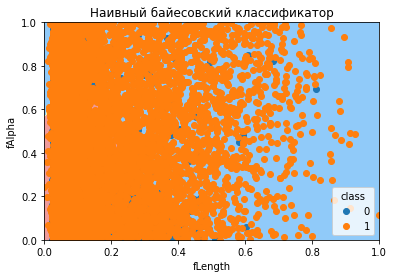

In [37]:
plot_decision_boundary(nbc, axis=[0, 1, 0, 1])
plt.scatter(X[y==0,0], X[y==0,1], label='0')
plt.scatter(X[y==1,0], X[y==1,1], label='1');
plt.xlabel("fLength")
plt.ylabel("fAlpha")
plt.title("Наивный байесовский классификатор")
plt.legend(title='class')
plt.show()

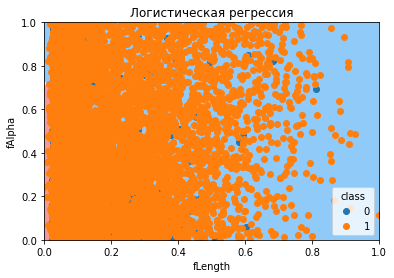

In [43]:
plot_decision_boundary(log_reg, axis=[0, 1, 0, 1])
plt.scatter(X[y==0,0], X[y==0,1], label='0')
plt.scatter(X[y==1,0], X[y==1,1], label='1');
plt.xlabel("fLength")
plt.ylabel("fAlpha")
plt.title("Логистическая регрессия")
plt.legend(title='class')
plt.show()


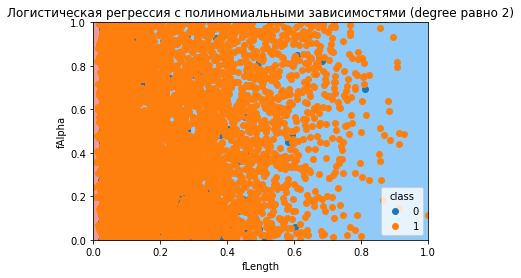

In [38]:
plot_decision_boundary(poly_log_reg2, axis=[0, 1, 0, 1])
plt.scatter(X[y==0,0], X[y==0,1], label='0')
plt.scatter(X[y==1,0], X[y==1,1], label='1');
plt.xlabel("fLength")
plt.ylabel("fAlpha")
plt.title("Логистическая регрессия с полиномиальными зависимостями (degree равно 2)")
plt.legend(title='class')
plt.show()

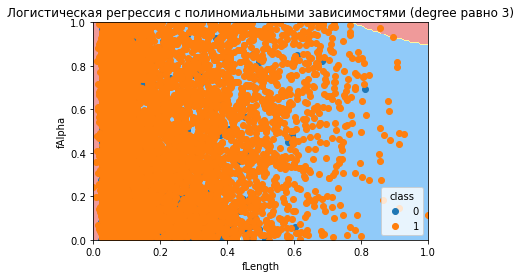

In [40]:
plot_decision_boundary(poly_log_reg3, axis=[0, 1, 0, 1])
plt.scatter(X[y==0,0], X[y==0,1], label='0')
plt.scatter(X[y==1,0], X[y==1,1], label='1');
plt.xlabel("fLength")
plt.ylabel("fAlpha")
plt.title("Логистическая регрессия с полиномиальными зависимостями (degree равно 3)")
plt.legend(title='class')
plt.show()


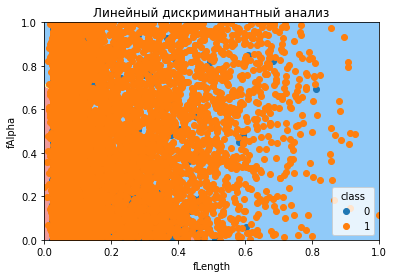

In [41]:
plot_decision_boundary(lda, axis=[0, 1, 0, 1])
plt.scatter(X[y==0,0], X[y==0,1], label='0')
plt.scatter(X[y==1,0], X[y==1,1], label='1');
plt.xlabel("fLength")
plt.ylabel("fAlpha")
plt.title("Линейный дискриминантный анализ")
plt.legend(title='class')
plt.show()

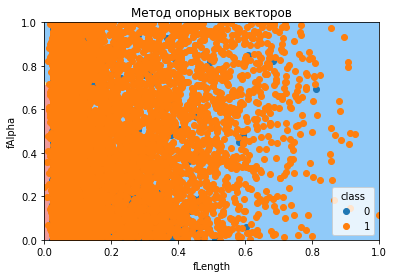

In [43]:
plot_decision_boundary(svc, axis=[0, 1, 0, 1])
plt.scatter(X[y==0,0], X[y==0,1], label='0')
plt.scatter(X[y==1,0], X[y==1,1], label='1');
plt.xlabel("fLength")
plt.ylabel("fAlpha")
plt.title("Метод опорных векторов")
plt.legend(title='class')
plt.show()


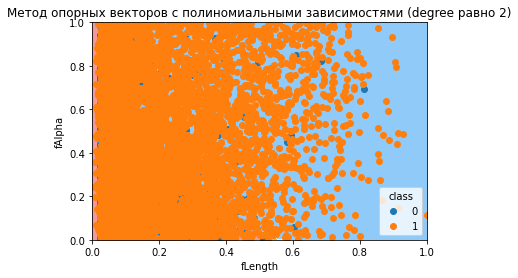

In [44]:
plot_decision_boundary(poly_svc2, axis=[0, 1, 0, 1])
plt.scatter(X[y==0,0], X[y==0,1], label='0')
plt.scatter(X[y==1,0], X[y==1,1], label='1');
plt.xlabel("fLength")
plt.ylabel("fAlpha")
plt.title("Метод опорных векторов с полиномиальными зависимостями (degree равно 2)")
plt.legend(title='class')
plt.show()

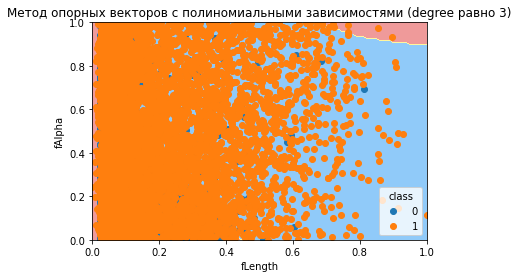

In [45]:
plot_decision_boundary(poly_svc3, axis=[0, 1, 0, 1])
plt.scatter(X[y==0,0], X[y==0,1], label='0')
plt.scatter(X[y==1,0], X[y==1,1], label='1');
plt.xlabel("fLength")
plt.ylabel("fAlpha")
plt.title("Метод опорных векторов с полиномиальными зависимостями (degree равно 3)")
plt.legend(title='class')
plt.show()

#### 9. Визуализируйте на одном рисунке ROC кривые для каждого из классификаторов, подписывая оси и рисунок и создавая легенду для методов бинарной классификации.

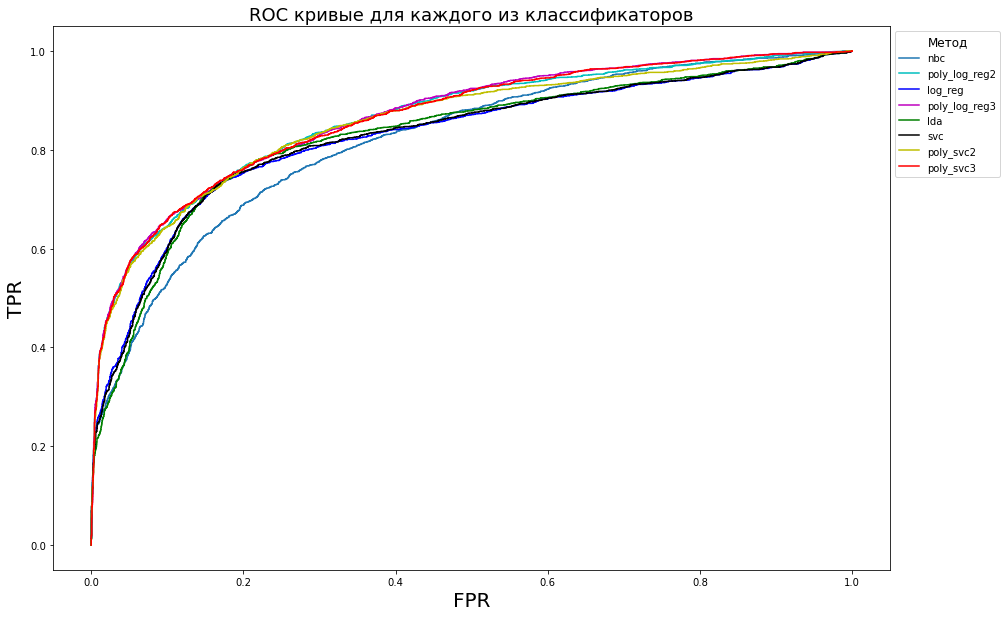

In [59]:
from sklearn.metrics import roc_curve
fig = plt.figure(figsize=(15,10))


decision_nbc = nbc.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, decision_nbc)
plt.plot(fprs, tprs, label = 'nbc')


decision_scores_log_reg = log_reg.decision_function(X_test)
fprs_log_reg, tprs_log_reg, thresholds = roc_curve(y_test, decision_scores_log_reg)



PolynomialLogisticRegression2 = poly_log_reg2.decision_function(X_test)
fprs_poly_log_reg2, tprs_poly_log_reg2, thresholds = roc_curve(y_test, PolynomialLogisticRegression2)


PolynomialLogisticRegression3 = poly_log_reg3.decision_function(X_test)
fprs_poly_log_reg3, tprs_poly_log_reg3, thresholds = roc_curve(y_test, PolynomialLogisticRegression3)


decision_scores_lda = lda.decision_function(X_test)
fprs_lda, tprs_lda, thresholds = roc_curve(y_test, decision_scores_lda)


decision_scores_svc = svc.decision_function(X_test)
fprs_svc, tprs_svc, thresholds = roc_curve(y_test, decision_scores_svc)


PolynomialSVC2 = poly_svc2.decision_function(X_test)
fprs_poly_svc2, tprs_poly_svc2, thresholds = roc_curve(y_test, PolynomialSVC2)


PolynomialSVC3 = poly_svc3.decision_function(X_test)
fprs_poly_svc3, tprs_poly_svc3, thresholds = roc_curve(y_test, PolynomialSVC3)


plt.plot(fprs_poly_log_reg2, tprs_poly_log_reg2, label="poly_log_reg2", c='c')

plt.plot(fprs_log_reg, tprs_log_reg, label="log_reg", c='b')
plt.plot(fprs_poly_log_reg3, tprs_poly_log_reg3, label="poly_log_reg3", c='m')
plt.plot(fprs_lda, tprs_lda, label="lda", c='g')
plt.plot(fprs_svc, tprs_svc, label="svc", c='k')
plt.plot(fprs_poly_svc2, tprs_poly_svc2, label="poly_svc2", c='y')
plt.plot(fprs_poly_svc3, tprs_poly_svc3, label="poly_svc3", c='r')

plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR", fontsize=20)
plt.title("ROC кривые для каждого из классификаторов", fontsize=18)
plt.legend(loc='best', bbox_to_anchor=(1, 1), title='Метод', title_fontsize='large')
plt.show()



#### 10.Определите лучший метод бинарной классификации набора данных по показателю ROC_AUC (площади под ROC кривой).

In [60]:
from sklearn.metrics import roc_auc_score
print("наивного байесовского классификатора: ",roc_auc_score(y_test, decision_nbc))
print("Логистическая регрессия: ",roc_auc_score(y_test, decision_scores_log_reg))
print("Линейный дискриминантный анализ: ",roc_auc_score(y_test, decision_scores_lda))
print("Метод опорных векторов: ",roc_auc_score(y_test, decision_scores_svc))
print("Логистическая регрессия с полиномиальными зависимостями (degree = 2): ",roc_auc_score(y_test, PolynomialLogisticRegression2))
print(" Логистическая регрессия с полиномиальными зависимостями (degree = 3): ",roc_auc_score(y_test, PolynomialLogisticRegression3))    
print(" Метод опорных векторов с полиномиальными зависимостями (degree = 2): ",roc_auc_score(y_test, PolynomialSVC2))
print(" Метод опорных векторов с полиномиальными зависимостями (degree = 3): ",roc_auc_score(y_test, PolynomialSVC3))

наивного байесовского классификатора:  0.8186149091893646
Логистическая регрессия:  0.826050915888631
Линейный дискриминантный анализ:  0.828034718718804
Метод опорных векторов:  0.8267562017225949
Логистическая регрессия с полиномиальными зависимостями (degree = 2):  0.8624071668537893
 Логистическая регрессия с полиномиальными зависимостями (degree = 3):  0.8656757233484456
 Метод опорных векторов с полиномиальными зависимостями (degree = 2):  0.8566359438444965
 Метод опорных векторов с полиномиальными зависимостями (degree = 3):  0.8638932564397328


Лучший метод бинарной классификации набора данных по показателю ROC_AUC:Логистическая регрессия с полиномиальными зависимостями (degree = 3)